# Project 2: Classification

You must document assistance in accordance with _Documentation of Academic Work._  You may use generative AI tools \(e.g., CoPilot, Perplexity, Gemini, ChatGPT\) to generate code and assist with drafting or editing written responses, provided their use is documented per the DAAW. _**Excessive use of generative AI tools may result in a lower grade**_. Keep in mind that AI\-generated material may be inaccurate or incomplete. If you use generative AI, you **must** provide the following with both an in\-text acknowledgement \(in our case, within the cell with comments\) as well as citation at the end. 

1. Describe how the material was generated, including prompts used.
2. Summarize the generative AI output \(preferably with a link to the conversation\).
3. Explain how you modified the output. 

<span style='color:#f44336'>200 Points, Individual project</span>

<span style='color:#f44336'><u>Due Dates</u></span><span style='color:#f44336'>: </span>

<span style='color:#f44336'>Due 10 March 2025 0740 hours</span>

***

The purpose of this project is to familiarize you with the complete process of building a _classification_ model end\-to\-end.  Please use Chapters 3, 4, 6, and 7 of _Hands\-on Machine Learning with Scikit\-Learn, Keras, and TensorFlow_ to complete the tasks below.

#### Problem Setting: Spaceship Titanic

You will participate in the ongoing Kaggle competition entitled **Spaceship Titanic**. The spaceship Titanic was an interstellar passenger liner with almost 13,000 passengers on board. The vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars. While rounding Alpha Centauri en route to its first destination—the Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Though the ship stayed intact, many of the passengers were transported to an alternate dimension! 

You are to create a model that predicts which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system. More info can be found at [https://www.kaggle.com/competitions/spaceship\-titanic](https://www.kaggle.com/competitions/spaceship-titanic).

The provided training data represents a partial manifest for which we know the outcome of each included passenger.  The test data contains necessary passenger info for the remainder of the passengers whose outcome is unknown. Both training and test data have been uploaded in this CoCalc directory for you; alternatively, you can download the data from Kaggle.

#### Project Grading

Much like the first project, this project will be broken into two main parts: the _Analysis_ and _Best Model_ portions.

<u>**Analysis**</u>

The Analysis portion is worth 160 points. You have been hired to join the team investigating the spaceship Titanic incident.  Your task is to write a **two\-page report plus appendices** \(written in LaTeX\) that will be delivered to your government's Space Travel Safety Board. The report should clearly explain the situation as well as the purpose and results of your model. Since the readers will be educated members of the public \(but not data scientists\), you must explain your models in _simple, non\-technical jargon_. Include the following in your two-page report:

1. Intro \(10 points\). Briefly describe the incident and explain how you are using advanced methods to help.
2. Methods/Approach \(40 points\). Give a high-level explanation of your methods and mention the key data considered.
3. Results \(40 points\). Summarize your findings \(use figures/tables in appendices if necessary\). Estimate your model's accuracy.  Clearly state which feature(s) maybe have been most associated with being transported or remaining on the ship. Acknowledge the uncertainty / limitations of your model.
4. Conclusion \(10 points\). Summarize findings and discuss suggestions for future work.

The point breakdown is as follows:

1. Well-written and succinct report \(see LaTeX Exemplar for formatting guidance\): 100 pts.
2. Quality of Python code in this notebook addressing each of the three tasks defined in bold in _Machine Learning Project Checklist_ steps 3, 4, and 5 below: 60 pts.

<u>**Best Model**</u>

The Best Model portion is worth 40 pts. For this portion, you will exclusively be evaluated on the **accuracy** \(percentage of predicted labels that are correct\) based on Kaggle's hidden test set results. Successful submission to Kaggle with close-to-the-top submission scores will get you 28 of the 40 points \(70%\). The rest is determined by the accuracy of your model compared to your peers. As this is an ongoing Kaggle competition, you can also assess how you're doing with everyone else on the leaderboard.



### 1. Look at the big picture.

_The goal of this competition is to predict which passengers were transported by the anomaly._ 


### 2. Get the data.

_Since you're already provided the data, you can skip points 1\-9 in Appendix A. You can also skip point 11 since we've already reserved a test set. Check the size and type of data here. Ensure you understand the data values by looking at the data dictionary on Kaggle:_ [https://www.kaggle.com/competitions/spaceship\-titanic/data](https://www.kaggle.com/competitions/spaceship-titanic/data).



In [1]:
import pandas as pd
df = pd.read_csv('train.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [3]:
df.isna().sum(axis=1).sum()

np.int64(2324)

In [4]:
df.Transported = df.Transported.map(lambda x: 1 if x is True else 0)

In [5]:
df[['Section', 'Number', 'Side']] = df['Cabin'].str.split('/', expand=True) #ChatGPT gave me this code to create a new column

In [6]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Section,Number,Side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S


### 3. Explore and visualize the training data to gain insights.



_Using pages 60\-67 as a guide, explore the training data to gain insights using a variety of visual tools._  

**Task 1. You must include _at least five plots_ and explain/summarize insights gained from each plot.** _Be sure to clearly label all axes, provide a title, and ensure your plots are readable!_ As part of this requirement, you must construct __at least 1 plot that we haven't covered in class__ that could provide an interesting insight \(see** https://seaborn.pydata.org/examples/index.html **for some ideas\). The plot should not be a simple bar chart, boxplot, or scatterplot.**

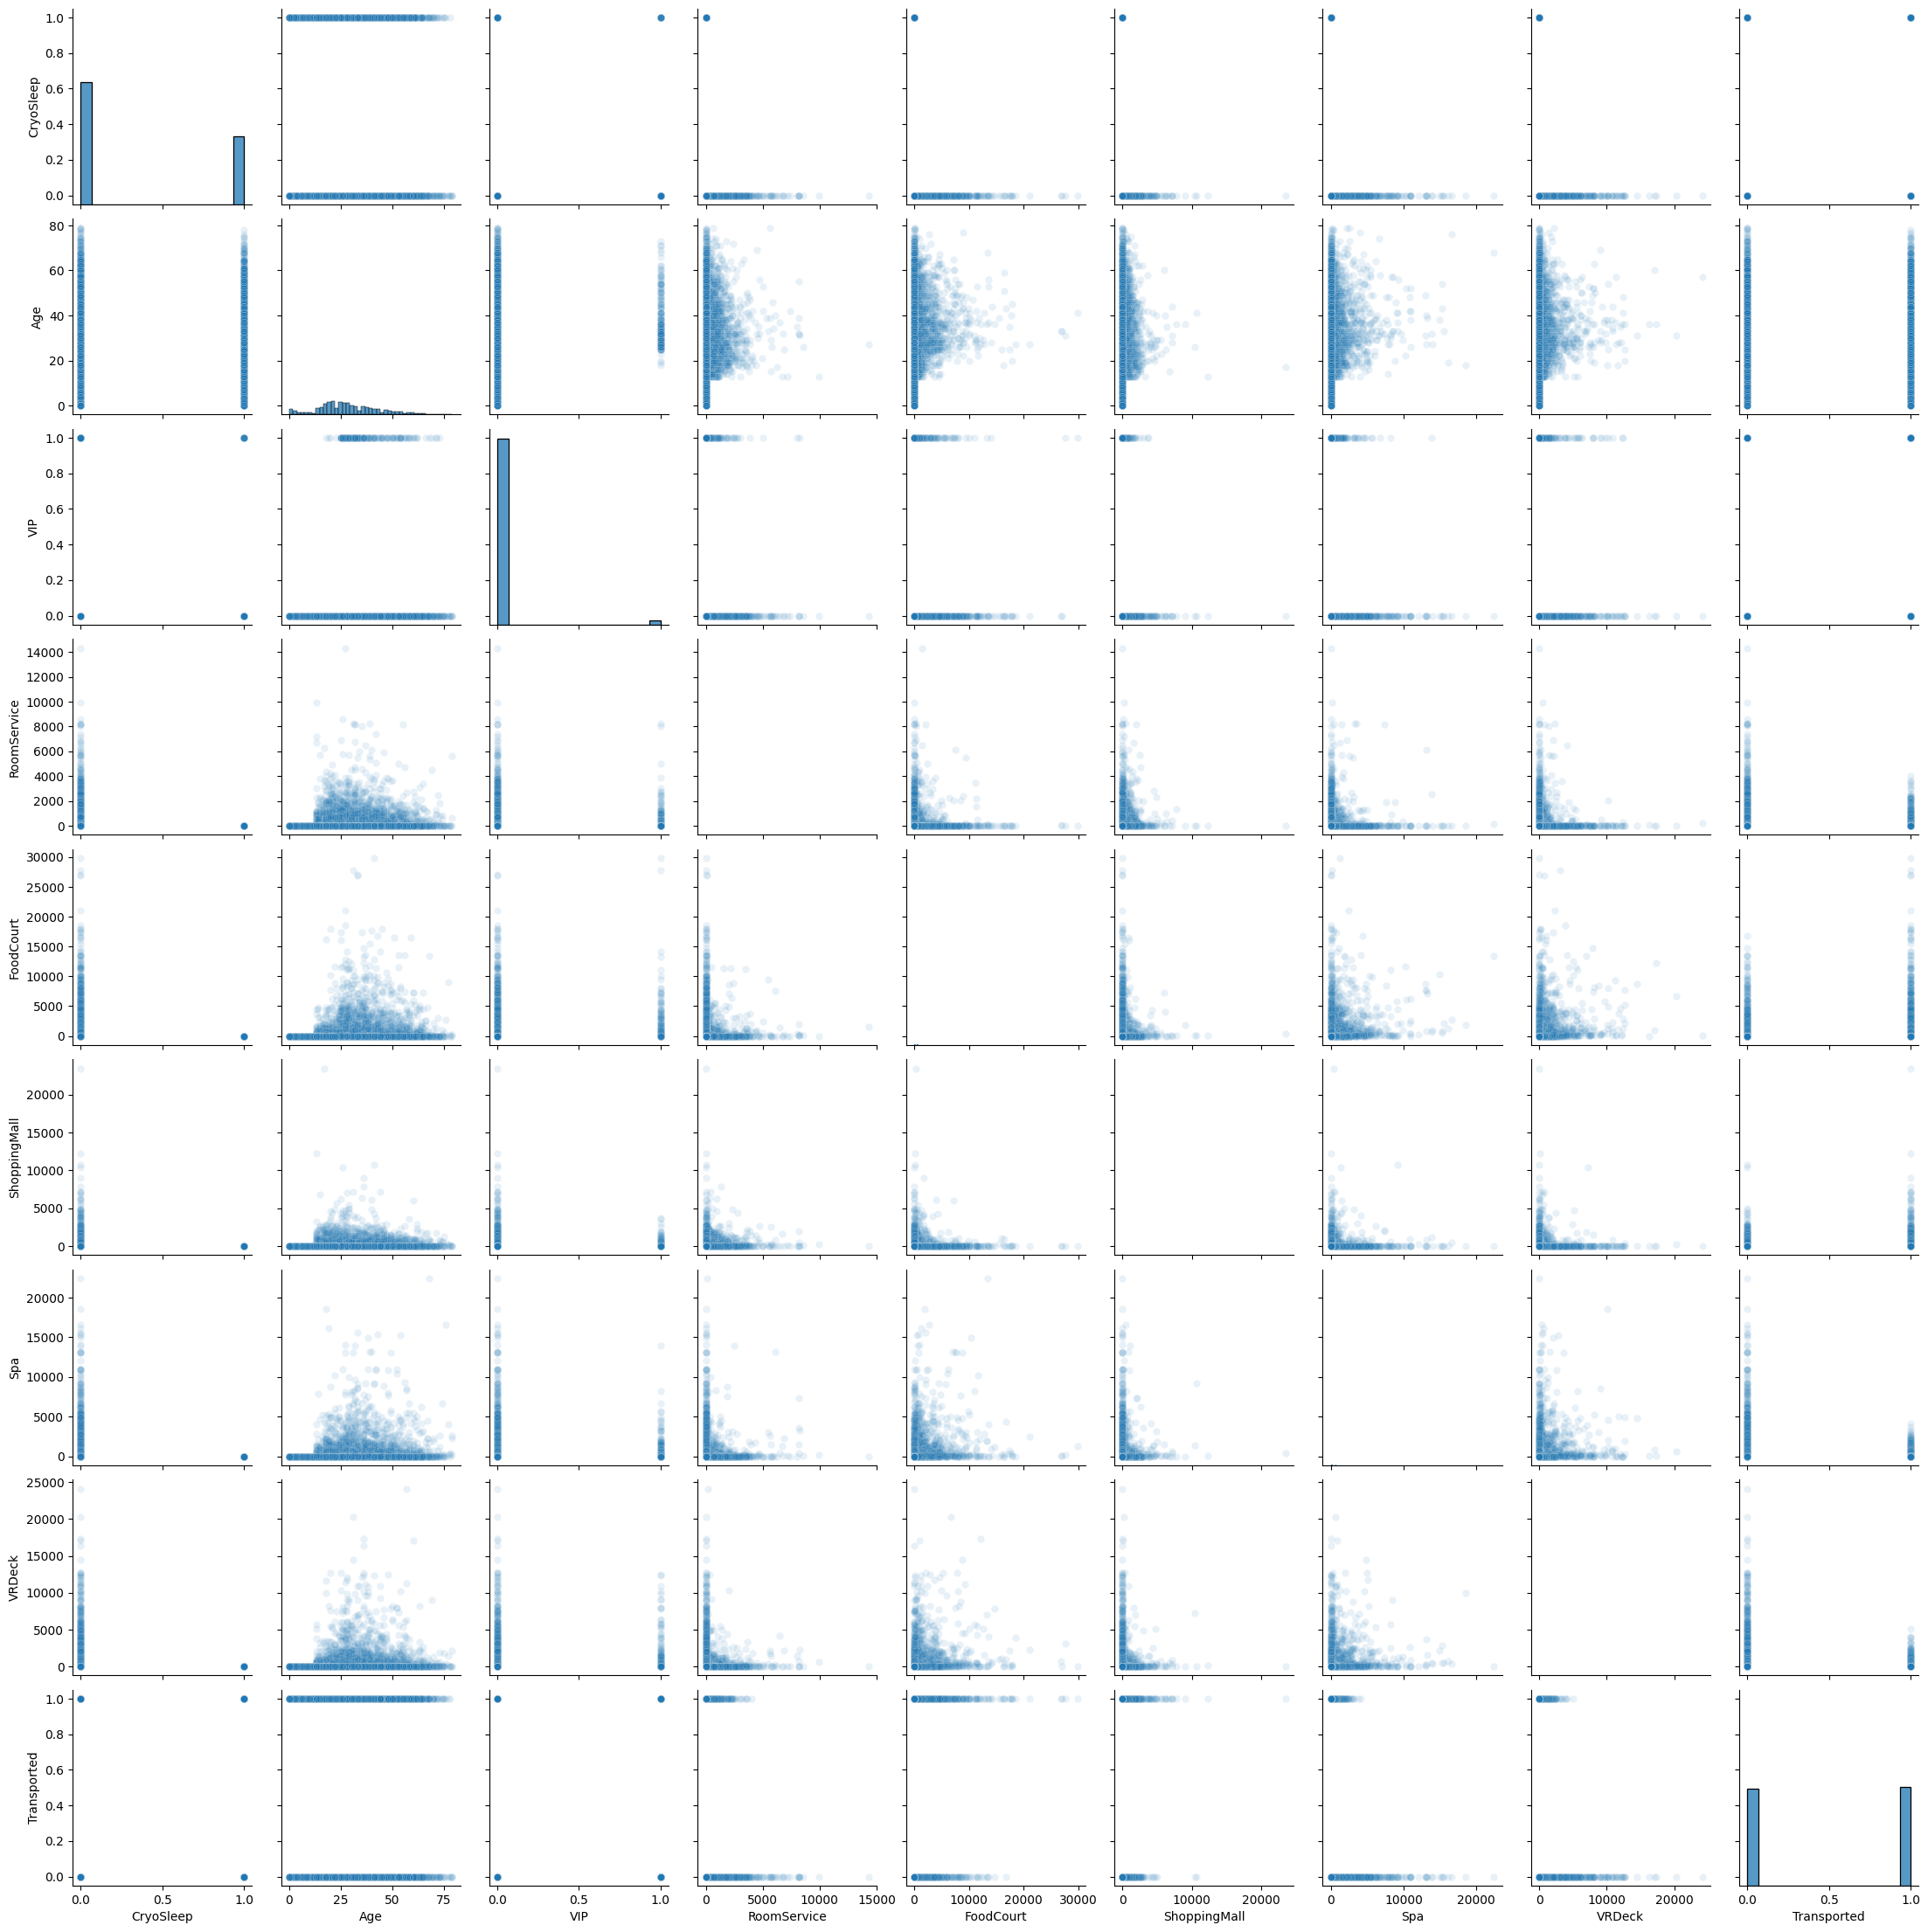

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.pairplot(data = df, plot_kws={'alpha':0.1})

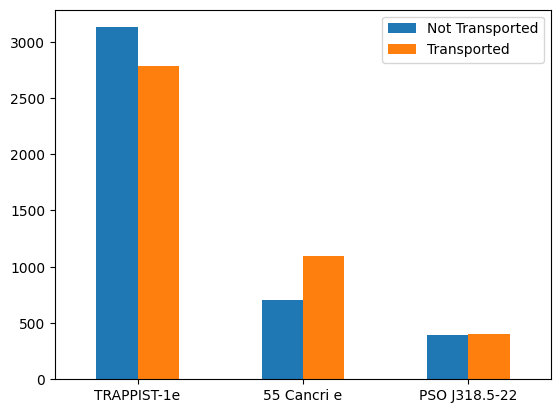

In [8]:
not_transported = df.groupby('Transported').Destination.value_counts().values[:3] #.plot(kind='barh')
transported = df.groupby('Transported').Destination.value_counts().values[3:] #.plot(kind='barh')
index = ['TRAPPIST-1e','55 Cancri e','PSO J318.5-22']

dest_plot = pd.DataFrame({'Not Transported': not_transported,
                   'Transported': transported}, index=index)

ax = dest_plot.plot.bar(rot=0)

Across all destinations, there does not seem to be a pattern determining whether or not individuals were transported.

Text(0.5, 1.0, "Proportion of Individual's Transported by Cryosleep Option")

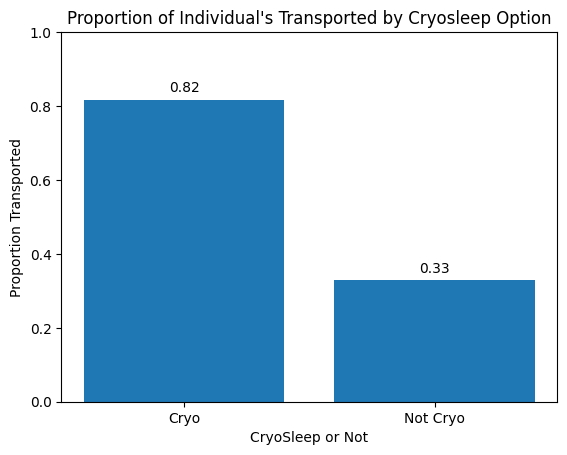

In [9]:
prop_transported = df.groupby('CryoSleep').Transported.mean().sort_values(ascending=False)

plt.bar(x = ['Cryo','Not Cryo'], height= prop_transported)

#ChatGPT generated these 2 lines of code to show proportions above the bars.
for i, v in enumerate(prop_transported):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.ylim([0,1])
plt.ylabel('Proportion Transported')
plt.xlabel("CryoSleep or Not")
plt.title("Proportion of Individual's Transported by Cryosleep Option")

Passengers who were in Cryopods had a higher transport rate than those who chose to sleep in suspended animation for the duration of the travel. This may indicate that individuals who are stored in their pods are more likely to be transported due to factors such as location on the ship or safety issues within the pod.

Text(0.5, 1.0, 'Frequency of Transportation by Room Number')

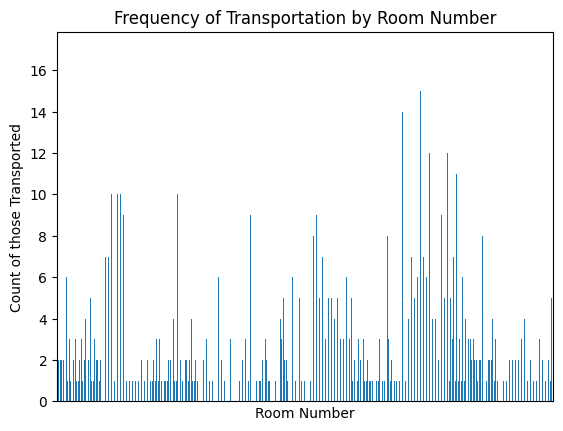

In [10]:
df.groupby('Number').Transported.sum().plot.bar()
plt.xticks([])
plt.ylabel("Count of those Transported")
plt.xlabel("Room Number")
plt.title("Frequency of Transportation by Room Number")

The image indicates that rooms that were close to one another tended to have similar transport rates. This makes sense as people who were living in the same areas were likely transported together.

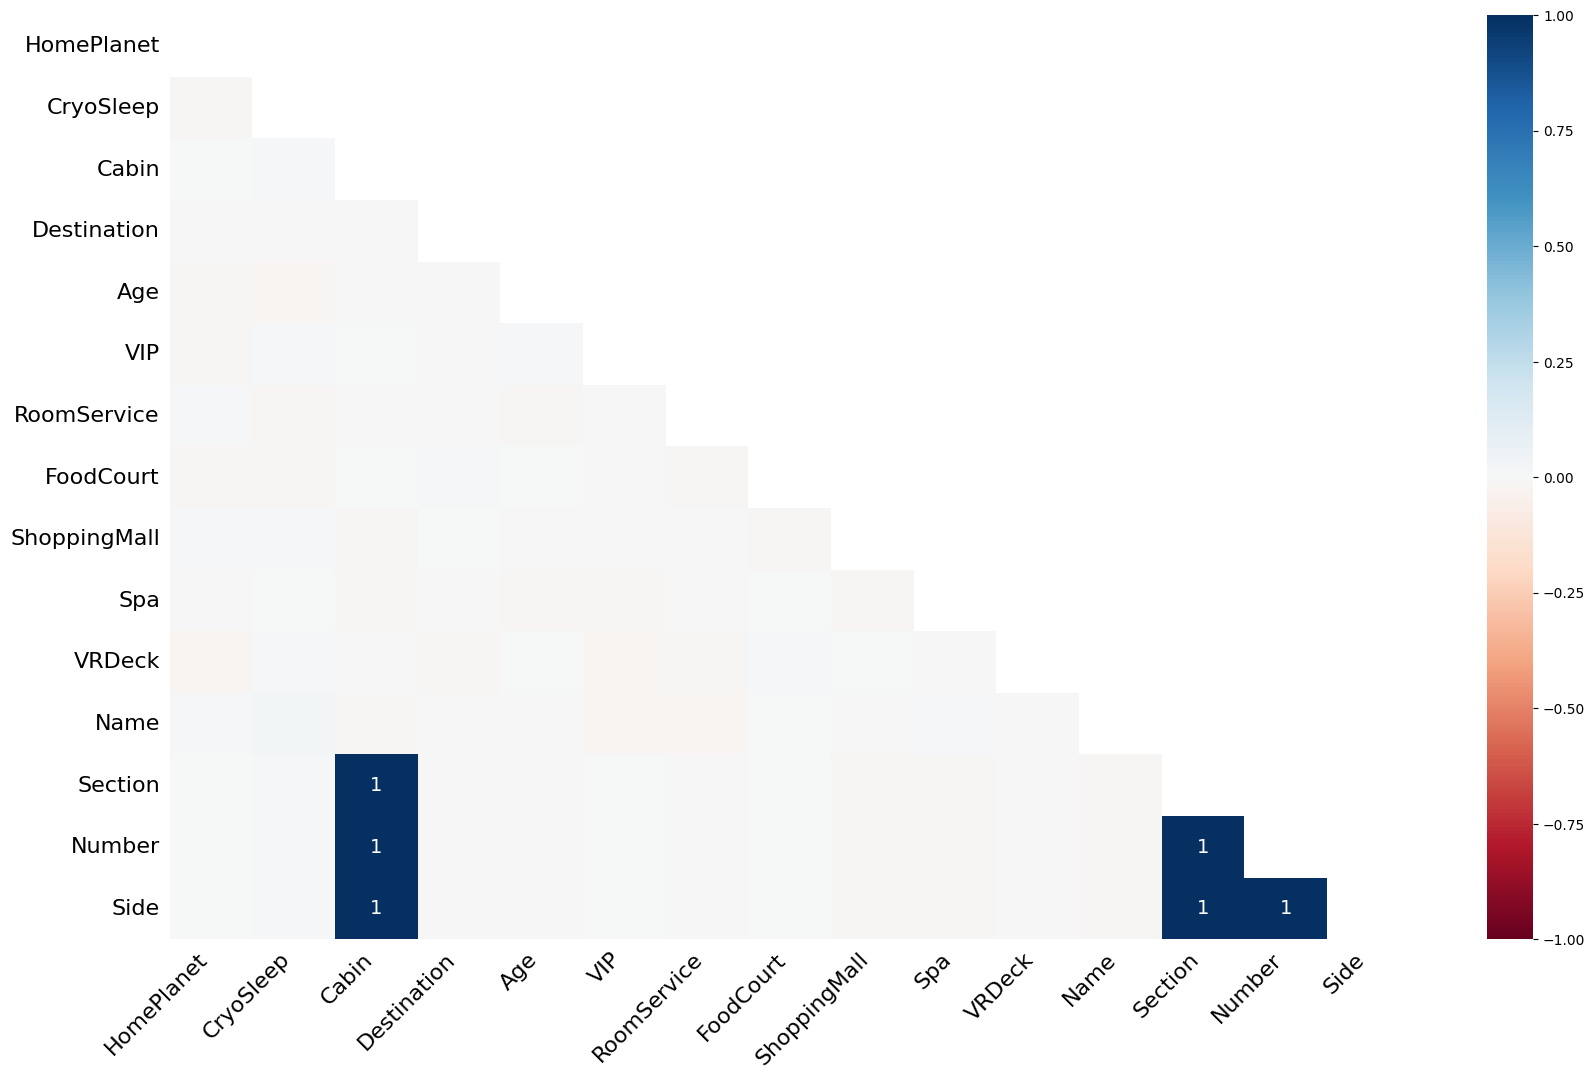

In [13]:
import missingno as msno
msno.heatmap(df)
plt.show()


The above heatmap depicts the correlation between missing values for certain columns of the dataframe. This measures how much one column of the data is missing when another column of the data is also missing. Here, we see that the only columns of the data with strong correlation are those which were all derived from the same pre-existing column in the data. Therefore, we do not need to be concerned about correlation of missing values if we choose to drop null values in the training data.

### 4. Prepare the data for machine learning algorithms.

Explain if/how you are handling the missing data or erroneous values in the data.  Are you scaling the data? Why or why not?

**Task 2. Create a data pipeline \(see pages 83\-88\) to prepare the data for analysis.**   Ensure the pipeline you create for your training data can be applied to the test data.



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   int64  
 14  Section       8494 non-null   object 
 15  Number        8494 non-null   object 
 16  Side          8494 non-null   object 
dtypes: float64(6), int64(1), object(10)
memory usage: 1.1+ MB


In [15]:
df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'Section', 'Number', 'Side'],
      dtype='object')

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel


class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters = 5, gamma = 1.0, random_state = None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y = None, sample_weight = None):
        self.kmeans_ = KMeans(self.n_clusters, n_init = 10,
                              random_state = self.random_state)
        self.kmeans_.fit(X, sample_weight = sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma = self.gamma)

    def get_feature_names_out(self, names = None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

full_df = df.dropna()
features = full_df.drop(columns=['Transported','PassengerId'], axis=1)
labels = full_df.Transported

cat_attributes = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination','VIP','Section','Side'] #Not using name or passengerID
num_attributes = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Number']

num_pipeline = Pipeline([
                        ('imputer',SimpleImputer(strategy = 'mean')),
                        ('std_scaler',StandardScaler()),
                        ])

cat_pipeline = Pipeline([('onehot',OneHotEncoder(handle_unknown='ignore', max_categories=50))]) #one-hot encoding cat. variables

cluster_simil = ClusterSimilarity(n_clusters = 10, gamma = 1.)

preprocessing = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", cat_pipeline, cat_attributes), 
        ("cluster", cluster_simil, ['Number']) #grouping clusters by room number
    ])

features_prepared = preprocessing.fit_transform(features)


x_test, x_train, y_test, y_train = train_test_split(features_prepared, labels, test_size = 0.9, stratify = labels, random_state = 477)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5946, 87), (660, 87), (5946,), (660,))

### 5. Shortlist Promising Models

**Task 3. You must create the following models for this project** and _compare the performance of each in a table_ \(report Accuracy, Precision, Recall, F1\-score, AUC\-ROC\) for each model.  Additionally, _briefly discuss any disadvantages_ of each model \(e.g., does the model handle nonlinearity well? high dimensionality well?\). If applicable, _ensure that the assumptions_ are met for each model.

1. LDA \(explain the importance of the assumptions for LDA\)
2. Logistic Regression \(for this model, you must also try a version that introduces a meaningful, nontrivial transformation to at least one numerical variable\).
3. SVM \(for this model, evaluate linear, polynomial, and RBF kernels\)
4. KNN \(ensure you show that you are selecting the best hyperparameters\)
5. Choice of Decision Tree or Random Forest \(Include a decision tree diagram for your best model and explain; if using random forest, include a feature importance plot and explain\)

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import numpy as np
import warnings
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_auc_score, f1_score
warnings.filterwarnings('ignore')

In [19]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [20]:
results = {}

log_reg = LogisticRegression()

x_train_transformed = x_train.copy()
x_test_transformed = x_test.copy()
x_train_transformed[:,0] = np.log1p(x_train[:,0]+1)
x_test_transformed[:,0] = np.log1p(x_test[:,0]+1)

log_reg.fit(x_train_transformed,y_train)
log_reg_preds = log_reg.predict(x_test_transformed)

print(confusion_matrix(y_test, log_reg_preds))
print("accuracy score: ", accuracy_score(y_test, log_reg_preds))
print("precision score: ", precision_score(y_test, log_reg_preds))
print("recall score: ", recall_score(y_test, log_reg_preds))
print("f1_score: ", f1_score(y_test, log_reg_preds))
print("AUC-ROC: ", roc_auc_score(y_test, log_reg.predict_log_proba(x_test_transformed)[:,0])) #ChatGPT showed me how to use predict_log_proba with roc_auc_score

results["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_test, log_reg_preds),
    "Precision": precision_score(y_test, log_reg_preds),
    "Recall": recall_score(y_test, log_reg_preds),
    "F1-score": f1_score(y_test, log_reg_preds),
    "AUC-ROC": roc_auc_score(y_test, log_reg_preds),
}

[[254  74]
 [ 65 267]]
accuracy score:  0.7893939393939394
precision score:  0.782991202346041
recall score:  0.8042168674698795
f1_score:  0.7934621099554234
AUC-ROC:  0.11683624742873935


Logistic Regression works by finding a linear relationship between the log odds of the probability of the outcome and the predictor variables. Therefore, logistic regression assume linearity and does not handle high-dimension data well.

In [21]:
lda = LinearDiscriminantAnalysis(solver='svd')

lda.fit(x_train,y_train)
lda_preds = lda.predict(x_test)

print(confusion_matrix(y_test, lda_preds))
print("accuracy score: ", accuracy_score(y_test, lda_preds))
print("precision score: ", precision_score(y_test, lda_preds))
print("recall score: ", recall_score(y_test, lda_preds))
print("f1_score: ", f1_score(y_test, lda_preds))
print("AUC-ROC: ", roc_auc_score(y_test, lda.predict_log_proba(x_test)[:,0]))

results["LDA"] = {
    "Accuracy": accuracy_score(y_test, lda_preds),
    "Precision": precision_score(y_test, lda_preds),
    "Recall": recall_score(y_test, lda_preds),
    "F1-score": f1_score(y_test, lda_preds),
    "AUC-ROC": roc_auc_score(y_test, lda_preds),
}

[[271  57]
 [103 229]]
accuracy score:  0.7575757575757576
precision score:  0.8006993006993007
recall score:  0.6897590361445783
f1_score:  0.7411003236245954
AUC-ROC:  0.15232882750514254


LDA works by finding the most discriminative axes between classes and using that to define a hyperplane on which to project the data. LDA assumes that the relationship between classes is linear, but as shown from the visualizations above, this is not the case here. 

In [22]:
svm = SVC(C=2, gamma=0.1, kernel='poly')

svm.fit(x_train,y_train)
svm_preds = svm.predict(x_test)

print(confusion_matrix(y_test, svm_preds))
print("accuracy score: ", accuracy_score(y_test, svm_preds))
print("precision score: ", precision_score(y_test, svm_preds))
print("recall score: ", recall_score(y_test, svm_preds))
print("f1_score: ", f1_score(y_test, svm_preds))
print("AUC-ROC: ", roc_auc_score(y_test, svm.predict(x_test)))

results["SVM"] = {
    "Accuracy": accuracy_score(y_test, svm_preds),
    "Precision": precision_score(y_test, svm_preds),
    "Recall": recall_score(y_test, svm_preds),
    "F1-score": f1_score(y_test, svm_preds),
    "AUC-ROC": roc_auc_score(y_test, svm_preds),
}

[[260  68]
 [ 65 267]]
accuracy score:  0.7984848484848485
precision score:  0.7970149253731343
recall score:  0.8042168674698795
f1_score:  0.800599700149925
AUC-ROC:  0.7984498971495739


In [26]:
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
knn_preds = knn.predict(x_test)

print(confusion_matrix(y_test, knn_preds))
print("accuracy score: ", accuracy_score(y_test, knn_preds))
print("precision score: ", precision_score(y_test, knn_preds))
print("recall score: ", recall_score(y_test, knn_preds))
print("f1_score: ", f1_score(y_test, knn_preds))
print("AUC-ROC: ", roc_auc_score(y_test, knn.predict(x_test)))

results["KNN"] = {
    "Accuracy": accuracy_score(y_test, knn_preds),
    "Precision": precision_score(y_test, knn_preds),
    "Recall": recall_score(y_test, knn_preds),
    "F1-score": f1_score(y_test, knn_preds),
    "AUC-ROC": roc_auc_score(y_test, knn_preds),
}

[[278  50]
 [ 93 239]]
accuracy score:  0.7833333333333333
precision score:  0.8269896193771626
recall score:  0.7198795180722891
f1_score:  0.7697262479871175
AUC-ROC:  0.7837202468410226


[[259  69]
 [ 91 241]]
accuracy score:  0.7575757575757576
precision score:  0.7774193548387097
recall score:  0.7259036144578314
f1_score:  0.7507788161993769
AUC-ROC:  0.7577688803996475


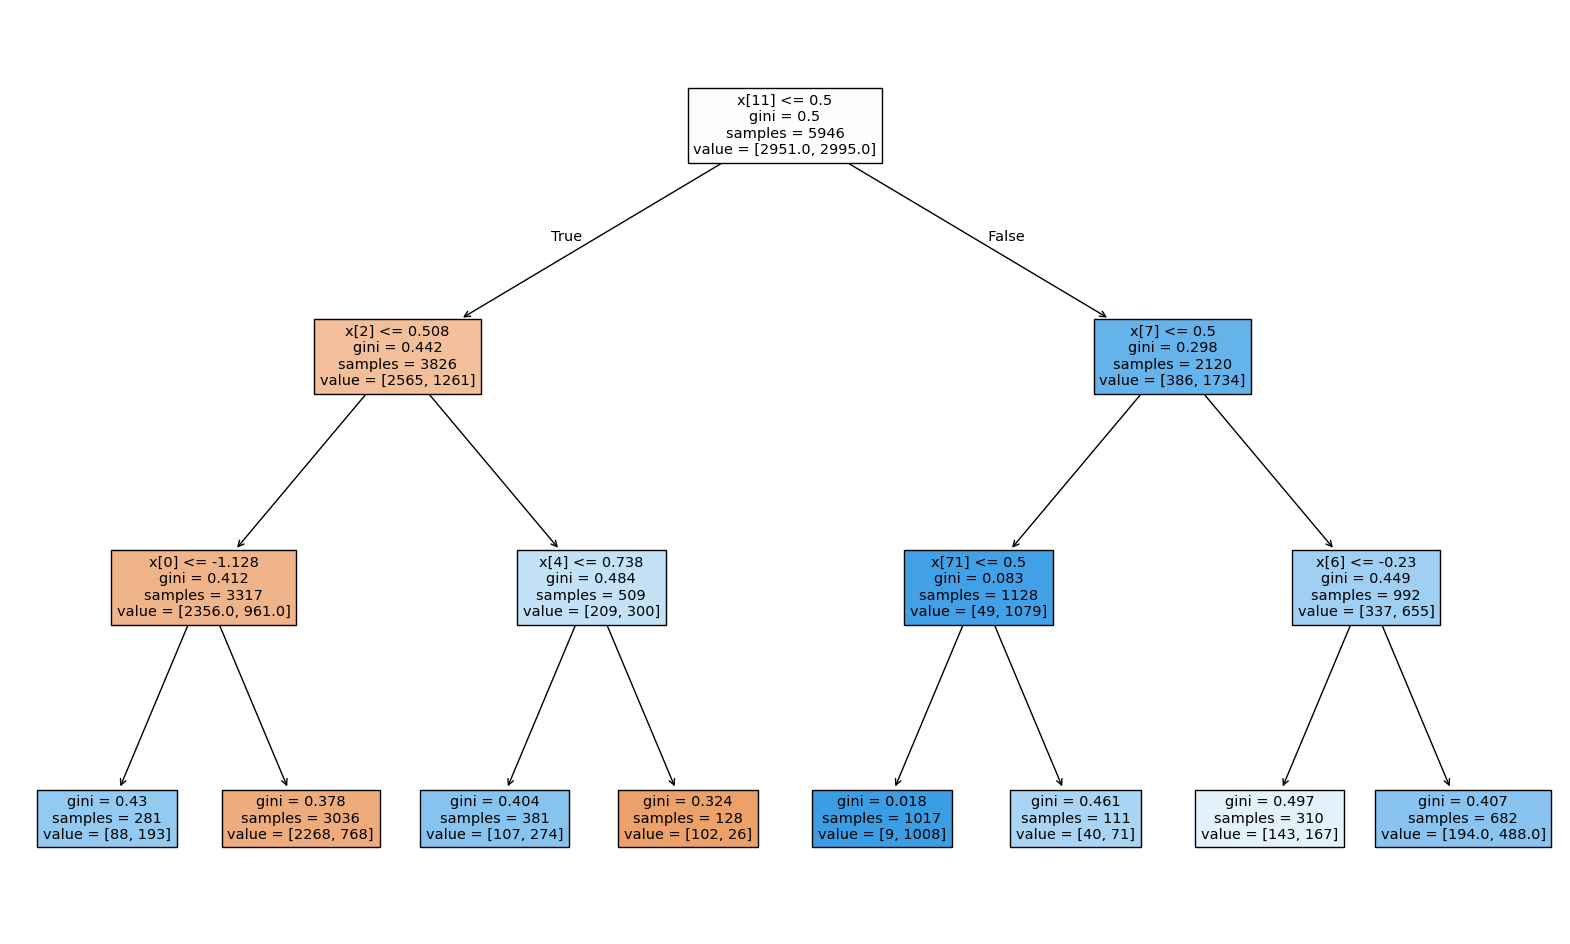

In [27]:
from sklearn.tree import plot_tree

tree = DecisionTreeClassifier(min_samples_split=20, max_depth = 3)

tree.fit(x_train,y_train)
tree_preds = tree.predict(x_test)

print(confusion_matrix(y_test, tree_preds))
print("accuracy score: ", accuracy_score(y_test, tree_preds))
print("precision score: ", precision_score(y_test, tree_preds))
print("recall score: ", recall_score(y_test, tree_preds))
print("f1_score: ", f1_score(y_test, tree_preds))
print("AUC-ROC: ", roc_auc_score(y_test, tree.predict(x_test)))

results["Random Forest"] = {
    "Accuracy": accuracy_score(y_test, tree_preds),
    "Precision": precision_score(y_test, tree_preds),
    "Recall": recall_score(y_test, tree_preds),
    "F1-score": f1_score(y_test, tree_preds),
    "AUC-ROC": roc_auc_score(y_test, tree_preds),
}

plt.figure(figsize=(20,12))
plot_tree(tree, filled=True)
plt.show()

In [28]:
# !pip install ace_tools_open
import pandas as pd
import ace_tools_open as tools  # ChatGPT recommended the ace_tools libaray for better table visualization

df_results = pd.DataFrame(results).T
tools.display_dataframe_to_user(name="Model Performance Comparison", dataframe=df_results)

Model Performance Comparison


**Include a Table with the results here. \(You can either paste an image of the table created elsewhere or use LaTeX within this notebook to create a nice table.\)**

### 6. Fine\-tune the System.

_Fine\-tune your models by experimenting with model hyperparameters._ If more fine-tuning on your most promising model is appropriate, do so here.



In [29]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Age', 'RoomService', 'FoodCourt',
                                  'ShoppingMall', 'Spa', 'VRDeck', 'Number']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                max_categories=50))]),
                                 ['HomePlanet', 'CryoSleep', 'Cabin',
                                  'Destination', 'VIP', 'Section', 'Side']),
                                ('cluster', ClusterSimilarity(n_clusters=10),
                                 ['Number'])])

In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingClassifier


full_pipeline = Pipeline([
        ('bag', BaggingClassifier(
            estimator=SVC(C=1, gamma = 0.05, kernel = 'linear'),
            n_estimators=175,  # Number of trees in ensemble
            max_samples=4000,   # Sample size (data points) for training each tree (doesn't have to be the full size of the training data)
            bootstrap=True,    # With replacement (default)
            random_state=477,
            oob_score = True))  # For repeatability
    ])



param_grid = [
    {'bag__estimator': [SVC(C=i, gamma = i, kernel = 'linear') for i in [1,3,5,0.05,0.1,0.15]]},
    {'bag__n_estimators':[100,200,300,400,500]}
]

grid_search = GridSearchCV(full_pipeline, param_grid, cv = 3, scoring = 'accuracy')
grid_search.fit(features_prepared, labels)

cv_res = pd.DataFrame(grid_search.cv_results_)

In [31]:
cv_res.sort_values(by='rank_test_score', ascending=True)[['params','mean_test_score','rank_test_score']]

,params,mean_test_score,rank_test_score
7,{'svm__kernel': 'linear'},0.794127,1
3,{'svm__gamma': 0.05},0.780805,2
4,{'svm__gamma': 0.1},0.772480,3
0,{'svm__C': 1},0.772480,3
6,{'svm__kernel': 'poly'},0.772480,3
1,{'svm__C': 3},0.765970,6
2,{'svm__C': 5},0.764759,7
5,{'svm__gamma': 0.15},0.764457,8


In [57]:
from matplotlib.colors import ListedColormap
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    estimator=SVC(C=.33, gamma = 0.05, kernel = 'linear'),
    n_estimators=100,  # Number of trees in ensemble
    max_samples=4000,   # Sample size (data points) for training each tree (doesn't have to be the full size of the training data)
    bootstrap=True,    # With replacement (default)
    random_state=477,
    oob_score = True)  # For repeatability

bag_clf.fit(x_train, y_train)

final_model_preds = bag_clf.predict(x_test)

results["BAG(SVM)"] = {
    "Accuracy": accuracy_score(y_test, final_model_preds),
    "Precision": precision_score(y_test, final_model_preds),
    "Recall": recall_score(y_test, final_model_preds),
    "F1-score": f1_score(y_test, final_model_preds),
    "AUC-ROC": roc_auc_score(y_test, final_model_preds),
}


In [52]:
print(confusion_matrix(y_test, final_model_preds))
print("accuracy score: ", accuracy_score(y_test, final_model_preds))
print("precision score: ", precision_score(y_test, final_model_preds))
print("recall score: ", recall_score(y_test, final_model_preds))
print("f1_score: ", f1_score(y_test, final_model_preds))
print("AUC-ROC: ", roc_auc_score(y_test, final_model_preds))

[[260  68]
 [ 74 258]]
accuracy score:  0.7848484848484848
precision score:  0.7914110429447853
recall score:  0.7771084337349398
f1_score:  0.78419452887538
AUC-ROC:  0.784895680282104


In [53]:
df_results = pd.DataFrame(results).T
tools.display_dataframe_to_user(dataframe=df_results, name="Model Performance Comparison")

Model Performance Comparison


In [ ]:
svm_model = bag_clf.estimators_[0]  # first SVM model in the ensemble; estimating w/ first one bc it is a BAG classifier
coefs = svm_model.coef_.flatten()

sorted_indices = abs(coefs).argsort()[::-1] #ChatGPT showed me how to find the most largest coefficient / most important feature

for i in sorted_indices:
    print(f"{feature_names[i]}: {coefs[i]:.4f}")

InvalidParameterError: The 'X' parameter of permutation_importance must be an array-like. Got <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 94827 stored elements and shape (6606, 87)> instead.

### 7. Present your solution.

_In your report, you should choose the best model and explain how it could be improved._



### 8. Launch, monitor, and maintain your system.

_Evaluate your final model on the test set \(provided in this project or alternatively, available on Kaggle\) and submit the CSV \(named_ _**CDT Last Name, First Name, MA477**_ _to Kaggle. Be sure to answer the survey here:_ https://forms.office.com/r/Y1uQejL9xw  _to report your Kaggle score._ 



In [34]:
test_df = pd.read_csv("test.csv")
test_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [35]:
test_df = test_df.sort_values(by=['ShoppingMall','RoomService'], ascending=[True, False]).fillna(method='ffill')

In [36]:
test_df[['Section', 'Number', 'Side']] = test_df['Cabin'].str.split('/', expand=True) #ChatGPT gave me this code to create a new column

In [37]:
test_features_prepared = preprocessing.transform(test_df)

In [38]:
test_preds = bag_clf.predict(test_features_prepared)

In [39]:
submission = test_df.copy()
submission['Transported'] = test_preds
submission.Transported  = submission.Transported.map(lambda x: "True" if x==1 else "False")
submission = submission[['PassengerId','Transported']]
submission.to_csv('CDT_Nordby_Kristian_MA477_Project2.csv', index=False)
submission.head()

,PassengerId,Transported
1237,2621_01,False
2741,6051_01,False
4135,8980_02,False
3151,6888_04,False
2447,5335_03,False


In [40]:
submission.Transported.value_counts()

Transported
True     2175
False    2102
Name: count, dtype: int64

In lieu of a cover page for this coding portion, complete the below:



#### Cadet Name: Kristian Nordby

#### Date:

#### KN -- I CERTIFY THAT I HAVE COMPLETELY DOCUMENTED ALL SOURCES THAT I USED TO COMPLETE THIS ASSIGNMENT AND THAT I ACKNOWLEDGED ALL ASSISTANCE I RECEIVED IN THE COMPLETION OF THIS ASSIGNMENT.


_Include any assistance or documentation here:_ 


ChatGPT, chatgpt.com. Assistance given to the author, code generation. ChatGPT generated my code to extract text from a column in the dataframe, to plot numbers above bars with plt.bar(), to build the correlation matrix for null values, acetools for table display, and how to find the most important features for the SVM. West Point, NY 12 2025.

Grok, grok.com. Assistance given to the author, text generation. I fed GRokAI my paragrpahs for the writeup and GROK made them shorter for me. West Point, NY 12MAR2025